In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [2]:
!unzip /content/drive/MyDrive/handwrittenDataset.zip

Archive:  /content/drive/MyDrive/handwrittenDataset.zip
  inflating: A_Z Handwritten Data.csv  
  inflating: A_Z Handwritten Data/A_Z Handwritten Data.csv  


In [3]:
data = pd.read_csv("/content/A_Z Handwritten Data.csv").astype('float32')
print(data.head(10))

     0  0.1  0.2  0.3  0.4  0.5  ...  0.643  0.644  0.645  0.646  0.647  0.648
0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
2  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
3  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
4  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
5  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
6  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
7  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
8  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
9  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0

[10 rows x 785 columns]


In [4]:
x = data.drop('0', axis=1)
y = data['0']
print(y)

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
372445    25.0
372446    25.0
372447    25.0
372448    25.0
372449    25.0
Name: 0, Length: 372450, dtype: float32


In [5]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)

train_x = np.reshape(train_x.values, (train_x.shape[0], 28, 28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28, 28))

print("Shape of training data: ", train_x.shape)
print("Shape of testing data: ", test_x.shape)

Shape of training data:  (297960, 28, 28)
Shape of testing data:  (74490, 28, 28)


In [6]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',
             10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',
             19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

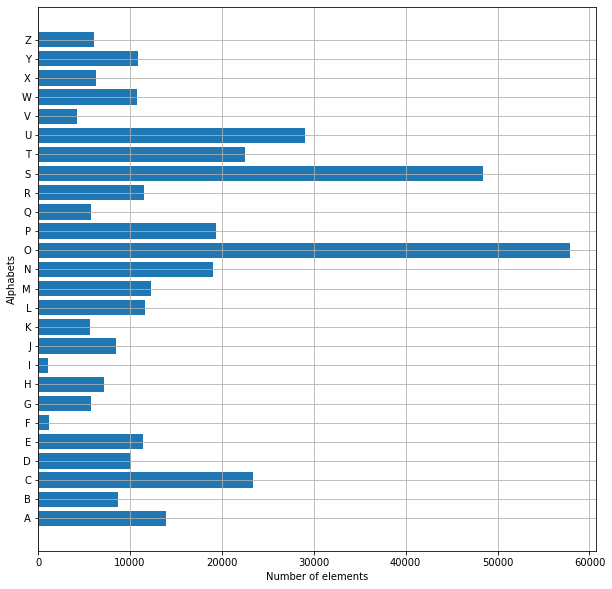

In [7]:
y_int = np.int0(y)
count = np.zeros(26, dtype='int')
for i in y_int:
  count[i]+=1

alphabets = []
for i in word_dict.values():
  alphabets.append(i)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.barh(alphabets, count)

plt.xlabel("Number of elements")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

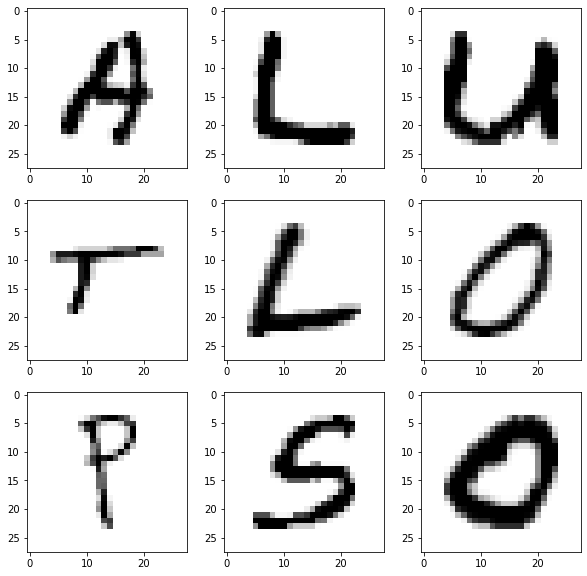

In [8]:
shuff = shuffle(train_x[:100])

fig, ax = plt.subplots(3, 3, figsize=(10, 10))
axes = ax.flatten()

for i in range(9):
  _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
  axes[i].imshow(np.reshape(shuff[i], (28, 28)), cmap="Greys")

plt.show()

**Reshaping the train & test image dataset so that they can be put in the model.**

In [9]:
train_X = train_x.reshape(train_x.shape[0], train_x.shape[1], train_x.shape[2], 1)
print("New shape of training data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2], 1)
print("New shape of testing data: ", test_x.shape)

New shape of training data:  (297960, 28, 28, 1)
New shape of testing data:  (74490, 28, 28)


In [10]:
from tensorflow.keras import utils as np_utils

In [11]:
train_yOHE = np_utils.to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = np_utils.to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


**Defining the CNN Model**

In [12]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(26, activation='relu'))

model.add(Dense(26, activation='softmax'))

**Compiling and fitting model**

In [13]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_yOHE, epochs=10, validation_data=(test_X, test_yOHE))

Epoch 1/10
9312/9312 [==============================] - 368s 39ms/step - loss: 0.6119 - accuracy: 0.8477 - val_loss: 0.0995 - val_accuracy: 0.9717
Epoch 2/10
9312/9312 [==============================] - 366s 39ms/step - loss: 0.0762 - accuracy: 0.9786 - val_loss: 0.0652 - val_accuracy: 0.9820
Epoch 3/10
9312/9312 [==============================] - 369s 40ms/step - loss: 0.0592 - accuracy: 0.9838 - val_loss: 0.0596 - val_accuracy: 0.9834
Epoch 4/10
9312/9312 [==============================] - 374s 40ms/step - loss: 0.0505 - accuracy: 0.9861 - val_loss: 0.0469 - val_accuracy: 0.9871
Epoch 5/10
9312/9312 [==============================] - 367s 39ms/step - loss: 0.0424 - accuracy: 0.9881 - val_loss: 0.0527 - val_accuracy: 0.9867
Epoch 6/10
9312/9312 [==============================] - 371s 40ms/step - loss: 0.0406 - accuracy: 0.9887 - val_loss: 0.0470 - val_accuracy: 0.9879
Epoch 7/10
9312/9312 [==============================] - 373s 40ms/step - loss: 0.0394 - accuracy: 0.9895 - val_loss: 0

In [21]:
model.summary()
model.save(r'model_hand_char.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

**Now, we will check for the accuracies and losses of train and validation**



In [22]:
print("Validation accuracy is: ", history.history['val_accuracy'])
print("Training accuracy is: ", history.history['accuracy'])

print("Validation loss is: ", history.history['val_loss'])
print("Training loss is: ", history.history['loss'])

Validation accuracy is:  [0.9716606140136719, 0.9820244312286377, 0.9833803176879883, 0.987125813961029, 0.9867096543312073, 0.98790442943573, 0.9821452498435974, 0.9860115647315979, 0.9880520701408386, 0.9883877038955688]
Training accuracy is:  [0.9378070831298828, 0.9790642857551575, 0.9835917353630066, 0.9855685234069824, 0.9872667193412781, 0.9879648089408875, 0.9886528253555298, 0.9896831512451172, 0.9898979663848877, 0.9903141260147095]
Validation loss is:  [0.09945881366729736, 0.06519659608602524, 0.059630829840898514, 0.04688875004649162, 0.05266181379556656, 0.04699879139661789, 0.07006082683801651, 0.05584084242582321, 0.05301131308078766, 0.05242495611310005]
Training loss is:  [0.22800461947917938, 0.07481186836957932, 0.059643689543008804, 0.052748650312423706, 0.046636052429676056, 0.04409929737448692, 0.04266853258013725, 0.03968505188822746, 0.038273606449365616, 0.03648286685347557]


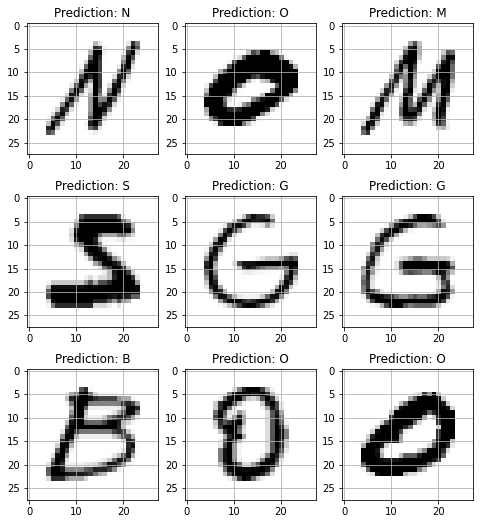

In [23]:
fig, axes = plt.subplots(3, 3, figsize=(8, 9))
axes = axes.flatten()

for i, ax in enumerate(axes):
  img = np.reshape(test_X[i], (28, 28))
  ax.imshow(img, cmap="Greys")

  pred = word_dict[np.argmax(test_yOHE[i])]
  ax.set_title("Prediction: "+pred)
  ax.grid()

In [47]:
img = cv2.imread(r'/content/drive/MyDrive/Char_O.jpg')
img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))

img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))


img_pred = word_dict[np.argmax(model.predict(img_final))]
print("Prediction : ",img_pred)

Prediction :  O


In [48]:
from google.colab.patches import cv2_imshow

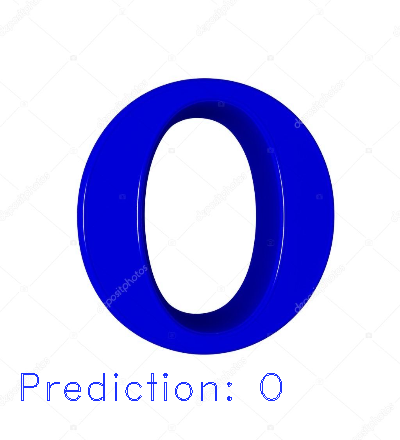

In [49]:
cv2.putText(img, "Prediction: " + img_pred, (16,400), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,51,30))
cv2_imshow(img)

In [50]:
img = cv2.imread(r'/content/drive/MyDrive/char_S.jpg')
img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))

img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))


img_pred = word_dict[np.argmax(model.predict(img_final))]
print("Prediction: ",img_pred)

Prediction:  S


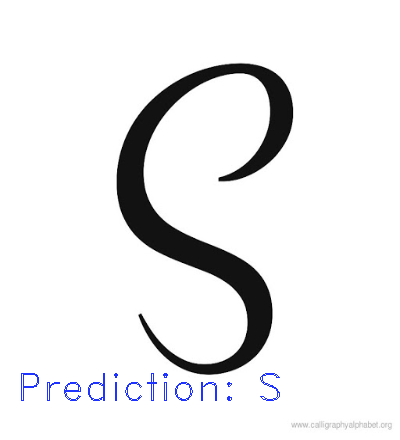

In [51]:
cv2.putText(img, "Prediction: " + img_pred, (16,400), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,51,30))
cv2_imshow(img)

In [ ]:
while(1):
  k = cv2.waitKey(1) & 0xFF
  if k ==27:
    break
cv2.destroyAllWindows